In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from app import *

In [5]:
#from app storm is reported, this app 
stm=storm[691240]
latrange=[38,39.5]
lonrange=[-80.5,-78]

lon_0 = np.mean(lonrange)
lat_0 = np.mean(latrange)
m = Basemap(projection='merc',lon_0=lon_0, lat_0=lat_0, lat_ts=lat_0,
            llcrnrlat=np.min(latrange), urcrnrlat=np.max(latrange),
            llcrnrlon=np.min(lonrange), urcrnrlon=np.max(lonrange))


IndexError: list index out of range

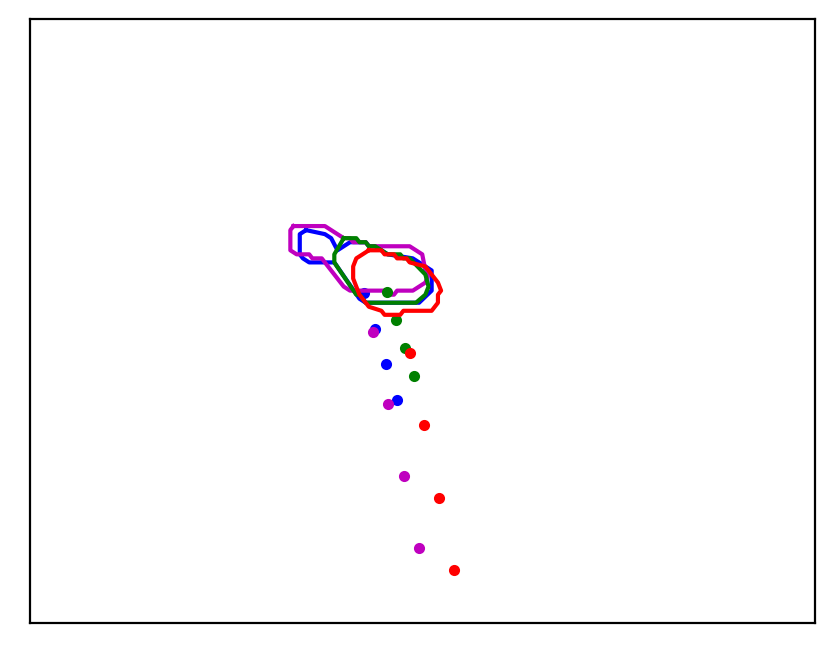

In [19]:
crds = stm['coordinates']
c =['b','m','g' ,'r']
plt.figure(dpi=200)
for i,crds in enumerate(stm['coordinates']):
    lon0,lat0=np.rollaxis(np.array(crds), 2, 0)
    x0,y0=m(lon0,lat0)
    m.plot(*x0,*y0, marker=None,color=c[i])
    stm_trk = stm['st_linear'][i]
    lons, lats = np.rollaxis(np.array([stm_trk]), 2, 0)
    x,y=m(lons,lats)
    m.plot(x,y,marker=".",color=c[i])

plt.show()

[[[-79.62, 38.98], [-79.56, 38.97], [-79.54, 38.96], [-79.52, 38.93], [-79.48, 38.95], [-79.43, 38.95], [-79.42, 38.94], [-79.4, 38.94], [-79.36, 38.92], [-79.28, 38.91], [-79.22, 38.88], [-79.22, 38.83], [-79.26, 38.8], [-79.43, 38.8], [-79.45, 38.81], [-79.53, 38.9], [-79.61, 38.9], [-79.63, 38.91], [-79.64, 38.92], [-79.64, 38.97], [-79.62, 38.98]]]


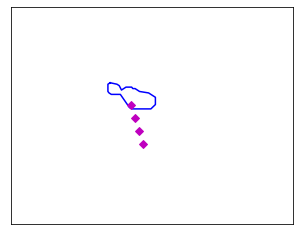

In [6]:



crds = stm['coordinates'][0]

print(crds)
lon0,lat0=np.rollaxis(np.array(crds), 2, 0)
x0,y0=m(lon0,lat0)
m.plot(*x0,*y0, marker=None,color='b')



stm_trk = stm['st_linear'][0]


lons, lats = np.rollaxis(np.array([stm_trk]), 2, 0)

x,y=m(lons,lats)

m.plot(x,y,marker="D",color='m')
plt.show()

In [ ]:
# print(col.shape)

In [ ]:
# page = pd.read_html(PROBSEVERE_URL+'?C=M;O=D')
# page_data = np.array(*page)[2:-1]
# data = pd.read_json(PROBSEVERE_URL+page_data[0][0])
# # print(np.array(data))
# return np.array(data)

In [ ]:
def handle_collection(collection):
    vt = collection[3]
    feat = collection[-1]
    return (vt, feat['geometry'],feat['properties'], feat['models']['probsevere']['LINE01'])

for prob in col:
    if int(handle_collection(prob)[2]['SIZE']) >150:
        
        vt, plygn, props, models = handle_collection(prob)
        print(vt, plygn, props, models)
        print("")
        
    else:
        pass
        

print(vt, plygn, props, models)


NameError: name 'col' is not defined

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [ ]:
crds=plygn['coordinates']
x=props['MOTION_EAST']
y=props['MOTION_SOUTH']
m=props['MEANWIND_1-3kmAGL']
#crds axis is rolled to restructre array
lons,lats = np.rollaxis(np.array(crds),2,0)
centroid = np.array([np.mean(lons),np.mean(lats)])

print( lons, lats, centroid )

In [ ]:
def scale_map(x):
    llclat=lats.min()-x
    urclat=lats.max()+x
    urclon=lons.min()-x
    llclon=lons.max()+x
    return Basemap(projection='merc',llcrnrlat=llclat,urcrnrlat=urclat,
                   llcrnrlon=urclon,urcrnrlon=llclon,lat_ts=20,resolution='c') 


plt.figure(dpi=150)

m = scale_map(.2)
x,y = m(*lons,*lats) 
m.plot(x, y, marker=None,color='m')

_x,_y = m(*centroid) 
m.plot(_x, _y, marker='D',color='b')

plt.show()

In [ ]:
llclat=lats.min()-.5
urclat=lats.max()+.5
urclon=lons.min()-.5
llclon=lons.max()+.5

def draw_screen_poly( lats, lons, m ):
    x, y = m( *lons, *lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='red', alpha=1 )
    plt.gca().add_patch(poly)


plt.figure(dpi=150)

m = Basemap(projection='merc',llcrnrlat=llclat,urcrnrlat=urclat,\
            llcrnrlon=urclon,urcrnrlon=llclon,lat_ts=20,resolution='c')

m.drawcoastlines()
m.drawmapboundary()
draw_screen_poly( lats, lons, m )
plt.show()

In [ ]:
def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor='red', alpha=0.4 )
    plt.gca().add_patch(poly)


In [ ]:
m = Basemap(projection='merc',llcrnrlat=10,urcrnrlat=55,\
            llcrnrlon=-160,urcrnrlon=-60,lat_ts=20,resolution='c')

draw_screen_poly( lats, lons, m )

# poly = Polygon( xy, facecolor='red', alpha=0.4 )


m.drawcoastlines()
m.drawcoastlines()
# m.plot([34.06842105, -75.17473684])
m.plot(20,15,'ro', markersize=10)
plt.title('Basemap',color='blue')
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
map = Basemap(projection='merc', lat_0=50, lon_0=4,
    resolution = 'l', area_thresh = 0.1,
    llcrnrlon=4, llcrnrlat=50,
    urcrnrlon=40, urcrnrlat=60)

# map.readshapefile('luthuania', 'any_name_you_like', drawbounds=True, linewidth=2, color='b')

map.drawcoastlines(linewidth=0.15)
map.drawcountries(linewidth=0.15)
map.fillcontinents(color='brown',lake_color='white')
map.drawmapboundary(fill_color='white')

In [ ]:
import matplotlib.pyplot as plt
# https://vlab.noaa.gov/web/wdtd/-/probsevere?selectedFolder=562123
print(f'EW as x = {x} || NS as y {y}')
plt.plot([x,y])
plt.ylabel('North-South')
plt.xlabel('East-West')
plt.show()

In [ ]:
print(f'mag {m} || MOTION EAST as X = {x} || MOTION WEST as y {y}')
# Wind Vectors

# Corfidi Vectors - The "Corfidi Upshear" vector is an estimate of net storm motion 
# for a "backbuilding" MCS, where the low-level storm inflow is subtracted from the 
# mean wind. The "Corfidi Downshear" vector is an estimate of net storm motion for a 
# "forward propagating" MCS where the low-level storm inflow is added to the mean wind. 
# Please refer to Corfidi, 2003 for more information.

# Bunkers Storm Motion Vectors - The "ID method", also known as the "Bunkers" method, 
# was developed by Bunkers et al. (2000) as an estimate of supercell motion. The Bunkers 
# method is gallilean invariant, thus it does not depend on the orientation of the 
# ground-relative winds. The Bunkers motion provides results similar to the 
# "30 degrees right and 75% of the mean wind speed" estimates for typical southwest flow 
# regimes, while the Bunkers motion estimate offers substantial improvments over the 30R75 
# technique in less common flow regimes (e.g., NW flow or SE flow associated with tropical cyclones). 
# Graphically, the Bunkers storm motion can be estimated by 1) plotting the shear vector from the 0-500 m 
# AGL mean wind to the 5500-6000 m AGL mean wind on a hodograph, 2) plotting the 0-6 km mean wind 
# (pressure weighted), and 3) drawing a vector (of 7.5 m s-1 magnitude) perpendicular to the 
# shear vector from the 0-6 km mean wind. 
# A perpendicular vector to the right represents the right (cyclonic in northern hemisphere) 
# supercell motion, and a left vector represents the left (anticyclonic in northern hemisphere) 
# supercell motion.

In [ ]:
plt.figure(dpi=150)
# time = np.array([0,15,30,45,60])
# azi = np.array([70 ,100 ,120, 150, 170])
ax = plt.subplot(111, projection='polar')
ax.plot(azi*np.pi/180, time, color='black', marker='D', markerfacecolor='limegreen')
# ax.set_theta_zero_location('N')
# ax.set_theta_direction(+1) # clockwise
ax.grid(True)

ax.set_ylabel('Time', color='crimson')
ax.tick_params(axis='y', colors='crimson')

plt.show()


In [ ]:

M = np.array([[1,1],[-2,2],[4,-7]])

rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
#This is optional
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-maxes[0],maxes[0]]) #<-- set the x axis limits
plt.ylim([-maxes[1],maxes[1]]) #<-- set the y axis limits
plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines

plt.show()